In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import torch
import torchphysics as tp
import pytorch_lightning as pl

In [87]:
x = torch.tensor((2, 4))
a = torch.tensor([[[1, 2, 3, 4], [1, 4, 5, 6], [1, 9, 5, 9], [1, 9, 5, 9]], 
                  [[1, 2, 3, 8], [0, 0, 5, 3], [1, 4, 5, 6], [1, 9, 5, 9]]])
padding = torch.zeros(2*len(x), dtype=torch.int32)
padding[1::2] = torch.flip(torch.floor((x - torch.tensor(a.shape[1:])) / 2.0), 
                            dims=(0,))
fft = torch.fft.rfftn(a, dim=(1, 2), norm="ortho")
print(fft, a.shape, fft.shape)
fft = torch.fft.rfft2(a, s=(2, 2), norm="ortho")
print(fft)
#fft_split = torch.fft.fft(torch.fft.fft(a, dim=2), dim=1)
#print(torch.abs(fft_split - fft))
#fft = torch.nn.functional.pad(
#        torch.fft.rfftn(a, dim=(-1, -2), norm="ortho"), 
#        padding.tolist()) # here remove to high freq.
#print(padding, fft.shape)
#print((torch.nn.functional.pad(fft, (-padding).tolist())).shape)
#weighted_fft = fft
#ifft = torch.fft.irfftn(
#        torch.nn.functional.pad(weighted_fft, (-padding).tolist()), # here add high freq.
#        dim=(-1, -2), norm="ortho")
#ifft

tensor([[[18.5000+0.0000j, -3.5000+1.0000j, -7.5000+0.0000j],
         [-3.5000+2.0000j,  1.0000+0.5000j,  2.5000-2.0000j],
         [-1.5000+0.0000j,  0.5000+0.0000j,  0.5000+0.0000j],
         [-3.5000-2.0000j,  0.0000+0.5000j,  2.5000+2.0000j]],

        [[15.5000+0.0000j, -3.7500+2.7500j, -5.0000+0.0000j],
         [-0.5000+4.0000j,  1.2500+1.2500j, -0.5000-3.5000j],
         [-0.5000+0.0000j,  0.7500+1.2500j,  0.0000+0.0000j],
         [-0.5000-4.0000j, -0.2500+0.7500j, -0.5000+3.5000j]]]) torch.Size([2, 4, 4]) torch.Size([2, 4, 3])
tensor([[[ 4.0000+0.j, -2.0000+0.j],
         [-1.0000+0.j,  1.0000+0.j]],

        [[ 1.5000+0.j, -0.5000+0.j],
         [ 1.5000+0.j, -0.5000+0.j]]])


In [43]:
x = torch.tensor((1, 2))
a = torch.tensor([[[1, 2, 3, 4, 5], [1, 4, 5, 6, 2], [1, 9, 5, 9, 2]], 
                  [[1, 2, 3, 8, 8], [0, 0, 5, 3, 2], [1, 4, 5, 6, 2]]])
padding = torch.zeros(2*len(x), dtype=torch.int32)
padding[1::2] = torch.flip((x - torch.tensor(a.shape[1:])), 
                            dims=(0,)) / 2
fft = torch.fft.rfftn(a, s=x.tolist(), norm="ortho") 
print(padding, fft)
print(torch.fft.rfftn(a, norm="ortho") )
weighted_fft = fft
ifft = torch.fft.irfftn(fft, s=(3, 5), norm="ortho")
ifft

tensor([ 0, -1,  0, -1], dtype=torch.int32) tensor([[[ 2.1213+0.j, -0.7071+0.j]],

        [[ 2.1213+0.j, -0.7071+0.j]]])
tensor([[[19.9006+0.0000j, -5.8753+1.0731j, -1.7928-1.7364j],
         [ 0.1826+2.5298j,  1.7317+2.6037j,  0.9396+0.0542j],
         [ 0.1826-2.5298j,  0.1402+2.9430j, -2.5377+1.4542j]],

        [[ 1.6432+0.0000j,  0.2257-1.8690j, -0.5908-1.6350j],
         [-2.7386+0.0000j,  0.6699-0.6000j,  0.7145+1.0904j],
         [-2.7386+0.0000j,  0.3691-0.3815j,  0.5286+1.6625j]]])


tensor([[[0.1826, 0.4349, 0.8431, 0.8431, 0.4349],
         [0.1826, 0.4349, 0.8431, 0.8431, 0.4349],
         [0.1826, 0.4349, 0.8431, 0.8431, 0.4349]],

        [[0.1826, 0.4349, 0.8431, 0.8431, 0.4349],
         [0.1826, 0.4349, 0.8431, 0.8431, 0.4349],
         [0.1826, 0.4349, 0.8431, 0.8431, 0.4349]]])

In [ ]:
a = torch.ones((5, 4, 100, 10))

In [11]:
a = torch.ones((2, 20))
a[1, :] = torch.sin(torch.linspace(0, 6, 20))
b = torch.fft.fftn(a, dim=1, norm="ortho")
torch.abs(torch.fft.ifftn(b, dim=1, norm="ortho") - a)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [6.1426e-09, 3.0781e-08, 1.1931e-07, 1.1947e-07, 1.7126e-08, 1.7883e-07,
         7.9779e-10, 5.9652e-08, 6.1000e-08, 2.9829e-08, 2.1280e-08, 8.3902e-09,
         5.9777e-08, 6.0192e-08, 1.7875e-09, 1.2602e-09, 1.4750e-08, 5.9639e-08,
         5.9693e-08, 2.9871e-08]])

In [2]:
t_end = 3.0
D_min, D_max = 0.01, 1.0
g = 9.81
H = 50.0

In [3]:
T = tp.spaces.R1('t')
D = tp.spaces.R1('D')
X = tp.spaces.R1('x')

int_t = tp.domains.Interval(T, 0, t_end)
int_D = tp.domains.Interval(D, D_min, D_max)

In [4]:
model = tp.models.FCN(T*D, X, hidden=(20, 20))

In [5]:
def ode_residual(x, t, D):
    #x *= 50.0
    x_t = tp.utils.grad(x, t)
    #x_tt = tp.utils.grad(x_t, t)
    return x_t - D * x**2 + g

ode_sampler = tp.samplers.RandomUniformSampler(int_t * int_D, n_points=5000)

ode_condition = tp.conditions.PINNCondition(model, ode_sampler, ode_residual)

In [6]:
def initial_residual(x):
    x *= 50.0
    return x - H

initial_sampler = tp.samplers.RandomUniformSampler(int_t.boundary_left * int_D, 500)

initial_condition = tp.conditions.PINNCondition(model, initial_sampler, initial_residual)

In [7]:
def initial_residual_v(x, t):
    #x *= 50.0
    #x_t = tp.utils.grad(x, t)
    return x # x_t

initial_condition_v = tp.conditions.PINNCondition(model, initial_sampler, initial_residual_v)

In [8]:
optim = tp.OptimizerSetting(optimizer_class=torch.optim.Adam, lr=0.001) 
solver = tp.solver.Solver([ode_condition, initial_condition_v],
                         optimizer_setting=optim)

trainer = pl.Trainer(gpus=1,
                     num_sanity_val_steps=0,
                     benchmark=True,
                     max_steps=7500,
                     logger=False,
                     checkpoint_callback=False
                     )

trainer.fit(solver)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name             | Type       | Params
------------------------------------------------
0 | train_conditions | ModuleList | 501   
1 | val_conditions   | ModuleList | 0     
------------------------------------------------
501       Trainable params
0         Non-trainable params
501       Total params
0.002     Total estimated model params size (MB)
/home/tomfre/miniconda3/envs/bosch/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/home/tomfre/miniconda3/envs/bosch/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarnin

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Text(0.5, 1.0, 'absolute error')

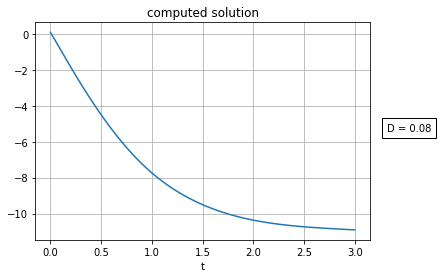

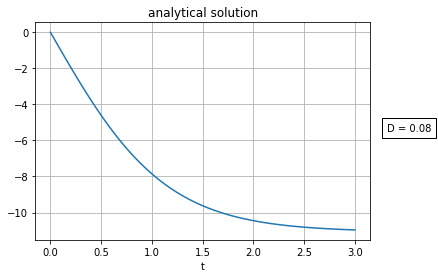

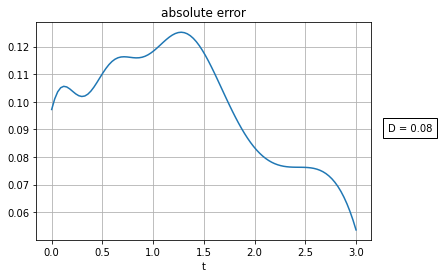

In [9]:
import matplotlib.pyplot as plt

D_test = 0.08

def analytic_solution(t, D):
    return torch.sqrt(g / D) * (2/(1 + torch.exp(2*torch.sqrt(D*g)*t)) - 1)
    #return 1/D * (-torch.log((1+torch.exp(-2*torch.sqrt(D*g)*t))/2) - torch.sqrt(D*g)*t) + H

plot_sampler = tp.samplers.PlotSampler(int_t, 100, data_for_other_variables={'D': D_test})
fig = tp.utils.plot(model, lambda x: x, plot_sampler)
plt.title("computed solution")

plot_sampler = tp.samplers.PlotSampler(int_t, 100, data_for_other_variables={'D': D_test})
fig = tp.utils.plot(model, lambda t,D: analytic_solution(t, D), plot_sampler)
plt.title("analytical solution")

fig = tp.utils.plot(model, lambda x,t,D: torch.abs(x - analytic_solution(t, D)), plot_sampler)
plt.title("absolute error")